Given the root of a binary tree, return the maximum width of the given tree.

The maximum width of a tree is the maximum width among all levels.

The width of one level is defined as the length between the end-nodes (the leftmost and rightmost non-null nodes), where the null nodes between the end-nodes are also counted into the length calculation.

It is guaranteed that the answer will in the range of 32-bit signed integer.

 

Example 1:

Input: root = [1,3,2,5,3,null,9]
Output: 4
Explanation: The maximum width existing in the third level with the length 4 (5,3,null,9).

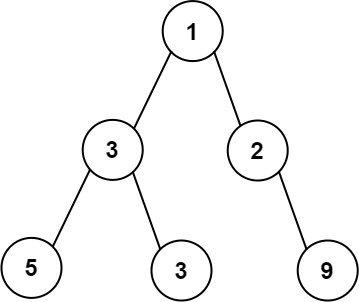

Example 2:

Input: root = [1,3,null,5,3]
Output: 2
Explanation: The maximum width existing in the third level with the length 2 (5,3).

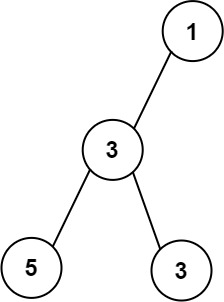

Example 3:

Input: root = [1,3,2,5]
Output: 2
Explanation: The maximum width existing in the second level with the length 2 (3,2).

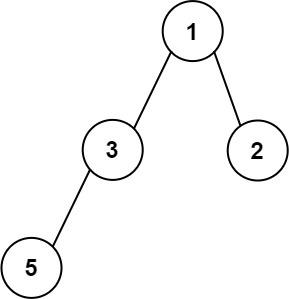
 

Constraints:

    The number of nodes in the tree is in the range [1, 3000].
    -100 <= Node.val <= 100



In [26]:
from typing import Optional
from collections import defaultdict

# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution:
    def widthOfBinaryTree(self, root: Optional[TreeNode]) -> int:
        if not root:
            return 0
        nodes_num = defaultdict(int)
        def nodeWalk(node, level):
            if node: 
                nodes_num[level] += 1
                nodeWalk(node.left, level + 1)
                nodeWalk(node.right, level + 1)
        nodeWalk(root, 0)
        return max(nodes_num.values())

In [27]:
class Solution:
    def widthOfBinaryTree(self, root: Optional[TreeNode]) -> int:
        #queue for keeping track
        q = [(0, root)]
        ans = 0
        while q:
            n = len(q)
            # nodes list to store indexes of all nodes at a level
            nodes = []
            for _ in range(n):
                idx, node = q.pop(0)
                nodes.append(idx)
                if node.left:
                    q.append((2*idx+1 , node.left))
                if node.right:
                    q.append((2*idx+2 , node.right))
            # max of ans or (right-most index - left-most index + 1) for a level
            ans = max(ans, max(nodes)-min(nodes)+1)
        return ans

In [28]:
s = Solution()
s.widthOfBinaryTree(TreeNode(1, TreeNode(2, TreeNode(3), TreeNode(4)), TreeNode(5, TreeNode(6))))

3

In [29]:
s.widthOfBinaryTree(TreeNode(1, TreeNode(2, TreeNode(3)), TreeNode(4)))

2